<a href="https://colab.research.google.com/github/porterjenkins/CS180/blob/main/data_science_labs/data_science_lab_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><p><b>After clicking the "Open in Colab" link, copy the notebook to your own Google Drive before getting started, or it will not save your work</b></p>

# BYU CS 180 Lab 12

In [3]:
# Dependencies for the lab
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

## Introduction:
In this lab you will fit regression models on multiple datasets.

## Exercise 1: Synthetic Data
First we will fit a regression model to multiple variants of a synthetic dataset. In each case, we know the true parameters (slope and intercept) and we will vary the noise of the data. Execute the following code to generate the data:

In [2]:
import numpy as np

w_0_true = -2.5 # this is the TRUE intercept
w_1_true = 0.1 # this is the TRUE slope

def f_x(x, w_0, w_1, sig):
  n = len(x)
  y = w_1*x + w_0 + np.random.normal(0, sig, n)
  return y

x = np.arange(0, 100)


y_1 = f_x(x, w_0_true, w_1_true, sig=0.5) # standard deviation = 0.5
y_2 = f_x(x, w_0_true, w_1_true, sig=1.5) # standard deviation = 1.5
y_3 = f_x(x, w_0_true, w_1_true, sig=5.0) # standard deviation = 5
y_4 = f_x(x, w_0_true, w_1_true, sig=10.0) # standard deviation = 10

### Question 1a:
For each of the four datasets we generated do the following:

* Plot a scatter plot of `x` and `y_i` (e.g, `x` and `y_2`)

* Fit a [linear regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) using sklearn (sklearn.linear_model.LinearRegression )

  * Make sure `fit_intercept` is set to `True`

  * hint: sklearn expects the features to be two-dimensional. You many need to use the following code to reshape your `x` array when training:

```
  reg = LinearRegression(fit_intercept=True)
  reg.fit(x.reshape(-1, 1), y) # reshape x to be two-dimensional
```
* Print the estimated coefficients:

  * These can be accessed with the `coef_` and `intercept_` attributes on the regression object

* Plot the regression line on the scatter plots of `x` and `y`

Comment on how well the regression model approximates the data

[0.09918634]
-2.536535205908829


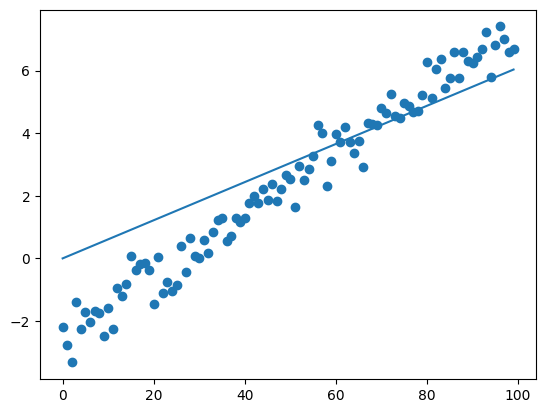

In [29]:
plt.scatter(x, y_1)
reg1 = LinearRegression(fit_intercept=True)
reg1.fit(x.reshape(-1,1), y_1)
print(reg1.coef_)
print(reg1.intercept_)
results = sm.OLS(y_1, x).fit()
slope_hat = results.params[0]
x_grid = np.linspace(x.min(), x.max())
y_hat = x_grid*slope_hat
plt.plot(x_grid, y_hat)

Doesn't fit the data super well, there are a lot of outliers on the bottom left. 

[0.09716908]
-2.540408747673234


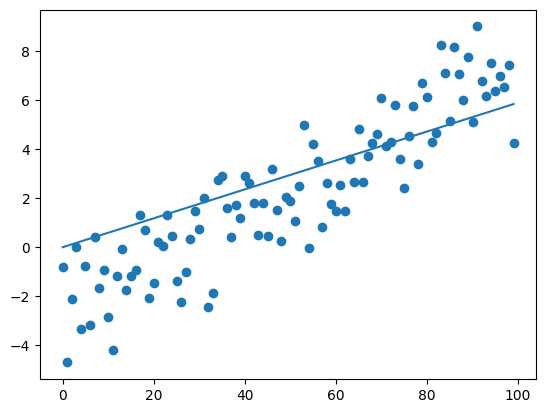

In [30]:
plt.scatter(x, y_2)
reg2 = LinearRegression(fit_intercept=True)
reg2.fit(x.reshape(-1, 1), y_2)
print(reg2.coef_)
print(reg2.intercept_)
results = sm.OLS(y_2, x).fit()
slope_hat = results.params[0]
x_grid = np.linspace(x.min(), x.max())
y_hat = x_grid*slope_hat
plt.plot(x_grid, y_hat)

Still outliers on the bottom left and top right

[0.10690438]
-2.154302950221789


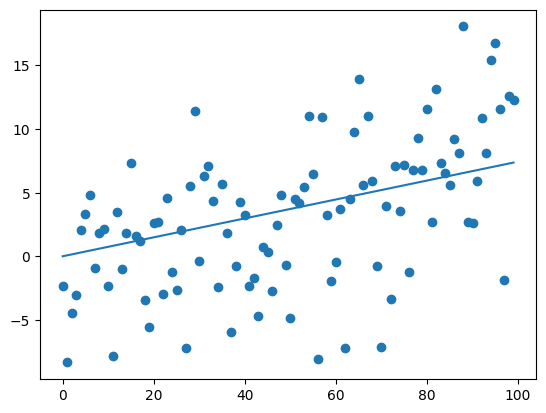

In [31]:
plt.scatter(x, y_3)
reg3 = LinearRegression(fit_intercept=True)
reg3.fit(x.reshape(-1, 1), y_3)
print(reg3.coef_)
print(reg3.intercept_)
results = sm.OLS(y_3, x).fit()
slope_hat = results.params[0]
x_grid = np.linspace(x.min(), x.max())
y_hat = x_grid*slope_hat
plt.plot(x_grid, y_hat)

This data shows a weak linear relationship, so the model can't represent it too well.

[0.07176042]
-0.7880191967244286


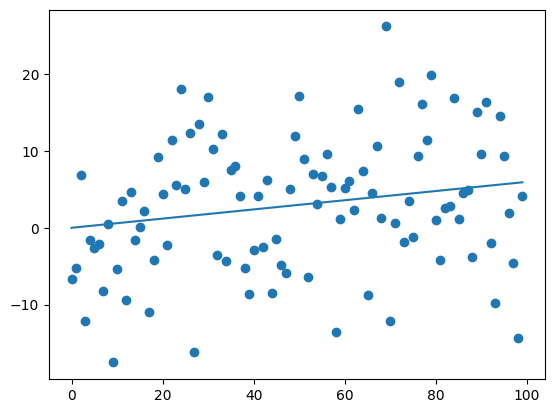

In [32]:
plt.scatter(x, y_4)
reg4 = LinearRegression(fit_intercept=True)
reg4.fit(x.reshape(-1, 1), y_4)
print(reg4.coef_)
print(reg4.intercept_)
results = sm.OLS(y_4, x).fit()
slope_hat = results.params[0]
x_grid = np.linspace(x.min(), x.max())
y_hat = x_grid*slope_hat
plt.plot(x_grid, y_hat)

This data shows an even weaker linear relationship so the model does a poor job of representing the data. 

### Question 1b:

What do you observe as we add noise to our generated dataset? How well are we able to recover the true parameters, `w_0_true` and `w_1_true` from the data as noise increases?

As noise is added, the data moves further and further away from the model. We can recover the true parameters by increasing the accuracy of np.linspace. 

# Exercise 2
Read the California Housing Data from the `sample_data` on every collab instance:

In [2]:
import pandas as pd
train = pd.read_csv("sample_data/california_housing_train.csv")
test = pd.read_csv("sample_data/california_housing_test.csv")

This dataset contains features on census tracts in California in the early 1990’s. The target is the variable `median_house_value` of each census tract.

### Exercise 2a:
Plot a [scatter_plot matrix](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.scatter_matrix.html) using the training data. You may need to tune the `fig_size` argument to make the figure larger. 

In [ ]:
pd.plotting.scatter_matrix(train, figsize = (12,12))

What variables appear to be correlated with `median_house_value`?

> median_income, lat and long coords

What variables are not correlated with `median_house_value`?

> housing_med_age, total_rooms, total_bedrooms, pop, households, 

What features appear to be correlated with each other?

> total_rooms with households, total_bedrooms and population
lat and long
total_bedrooms with household


### Exercise 2b
Fit a linear regression model using `sklearn`.
* Fit a few different models (each with different features).
* Evaluate the [mean_squared_error](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error) of your models with both the training and test set.

In [7]:
feat = ['latitude', 'longitude', 'median_income']
X_train = train[feat]
y_train = train["median_house_value"]
X_test = test[feat]
y_test = test["median_house_value"]
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
x_pred = model.predict(X_train)
mse_y = mean_squared_error(y_test.values, y_pred)
mse_x = mse = mean_squared_error(y_train.values, x_pred)
print(f'test: {mse_y}, train: {mse_x}')

test: 5520546528.355815, train: 5535438821.879477


In [8]:
feat2 = ['median_income', 'housing_median_age']
X_train = train[feat2]
y_train = train["median_house_value"]
X_test = test[feat2]
y_test = test["median_house_value"]
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
x_pred = model.predict(X_train)
mse_y = mean_squared_error(y_test.values, y_pred)
mse_x = mse = mean_squared_error(y_train.values, x_pred)
print(f'test: {mse_y}, train: {mse_x}')

test: 6542597407.100302, train: 6535814191.460647


In [9]:
feat3 = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'median_income', 'population']
X_train = train[feat3]
y_train = train["median_house_value"]
X_test = test[feat3]
y_test = test["median_house_value"]
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
x_pred = model.predict(X_train)
mse_y = mean_squared_error(y_test.values, y_pred)
mse_x = mse = mean_squared_error(y_train.values, x_pred)
print(f'test: {mse_y}, train: {mse_x}')

test: 5138248476.985099, train: 5182741638.603556


What did you observe? Which model yields the lowest test error?

> the error for all the training data is higher than the test, which can suggest the model is overfitting the data. The model with the lowest error is the third across all variables. 

### Exercise 2c
Fit a linear regression using the `statsmodels` api.
* Print the model output using `print(results.summary())`

In [47]:
X = train[["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income"]]
y = train["median_house_value"]
result = sm.OLS(y, X).fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:     median_house_value   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                          1.927e+04
Date:                Thu, 13 Apr 2023   Prob (F-statistic):                        0.00
Time:                        17:21:21   Log-Likelihood:                     -2.1492e+05
No. Observations:               17000   AIC:                                  4.298e+05
Df Residuals:                   16992   BIC:                                  4.299e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

Comment on which features appear to have the strongest relationship with `median_house_value`?

> The features that seem to have the strongest relationship with median_house_value are median_income, longitude, latitude, and housing_median_age. 

Write a sentence interpreting the coefficient for `median_income`.

> The coefficient for median_income in the linear regression model is 40,310, so for every increase by one in median income, we would expect median_house_value to increase by $40,301. 


